In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline 
import seaborn as sns

data=pd.read_csv("insurance3r2.csv")


In [ ]:
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   int64  
 6   region          1338 non-null   int64  
 7   charges         1338 non-null   float64
 8   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,5328.623318,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,2453.643236,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,3000.000000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,3008.000000,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,4007.000000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,8004.000000,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,10010.000000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [ ]:
data=data.dropna()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


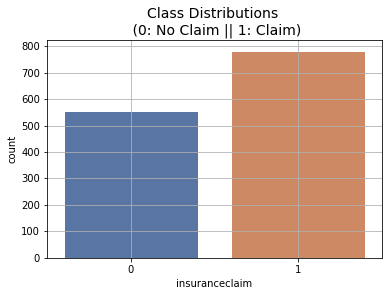

In [ ]:
plt.title('Class Distributions \n (0: No Claim || 1: Claim)', fontsize=14)
sns.set(style="darkgrid")
sns.countplot(data['insuranceclaim'])
plt.grid()
plt.show()


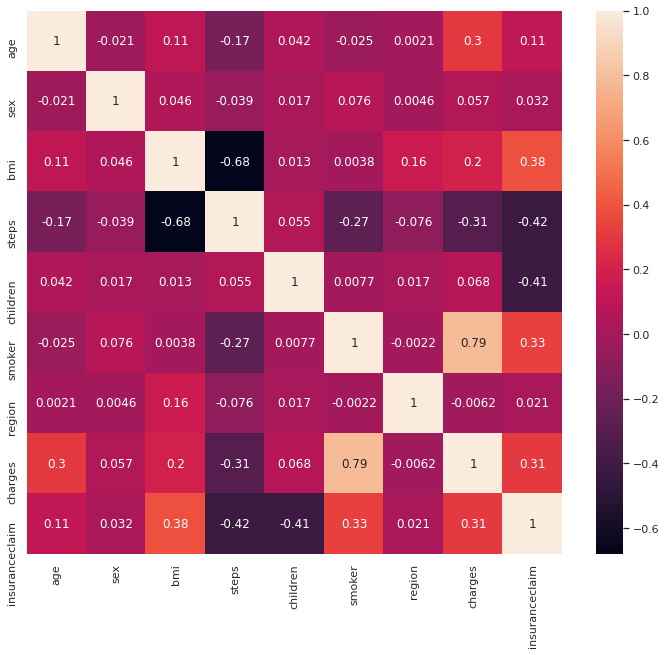

In [ ]:
#CORELATION
corr=data.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True)
plt.show()

data=data.drop('region',axis=1)


Text(0.5, 1.0, 'smoker vs charges')

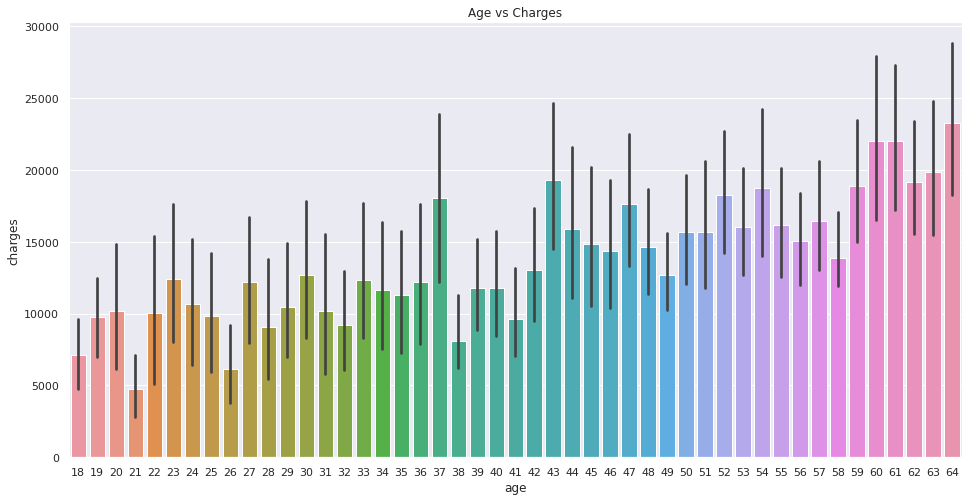

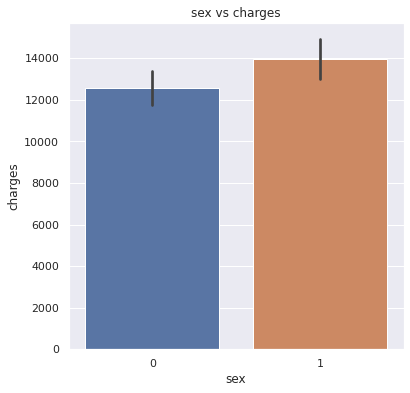

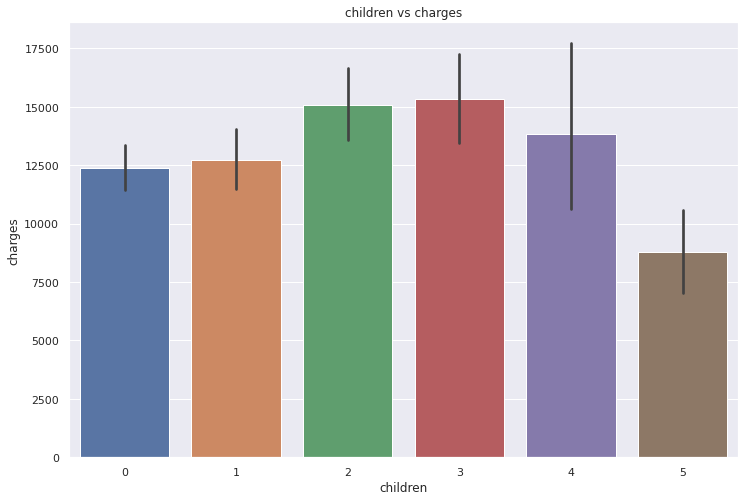

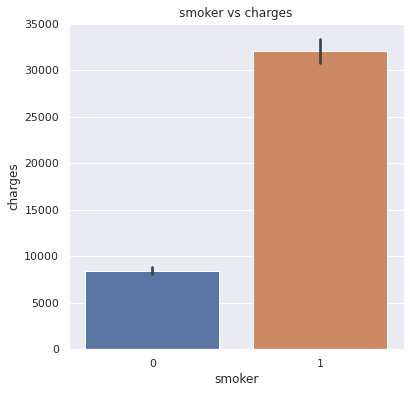

In [ ]:
#VISUALISATION
plt.figure(figsize = (16, 8))
sns.barplot(x = 'age', y = 'charges', data = data)

plt.title("Age vs Charges")

plt.figure(figsize = (6, 6))
sns.barplot(x = 'sex', y = 'charges', data = data)

plt.title('sex vs charges')

plt.figure(figsize = (12, 8))
sns.barplot(x = 'children', y = 'charges', data = data)

plt.title('children vs charges')

plt.figure(figsize = (6, 6))
sns.barplot(x = 'smoker', y = 'charges', data = data)
plt.title('smoker vs charges')


In [ ]:

X=data.iloc[:,:-1]
X.head()

X.shape

Y=data.iloc[:,-1]
Y.head()

Y.shape

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
data.to_csv('finaldata.csv')
X_test.to_csv('testing.csv')

from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

X_train=ss.fit_transform(X_train)

X_train

X_train=pd.DataFrame(X_train,columns=X_test.columns)

X_train

X_test=ss.fit_transform(X_test)

X_test=pd.DataFrame(X_test,columns=X_train.columns)

X_test

y_train


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train, y_train)
ypred=rf.predict(X_test)
print(confusion_matrix(y_test,ypred))


from sklearn.model_selection import cross_val_score
acc=cross_val_score(estimator=rf,X=X_train,y=y_train,cv=10)
acc.mean()
acc.std()


[[157   4]
 [ 15 226]]


0.01708083140926174